In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
company1 = pd.read_csv('Company_Data.csv')
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [5]:
company1.duplicated().sum()

0

In [6]:
company1.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [7]:
company1.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [8]:
company1.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

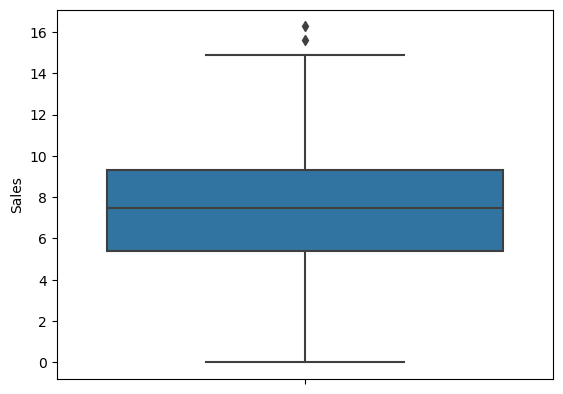

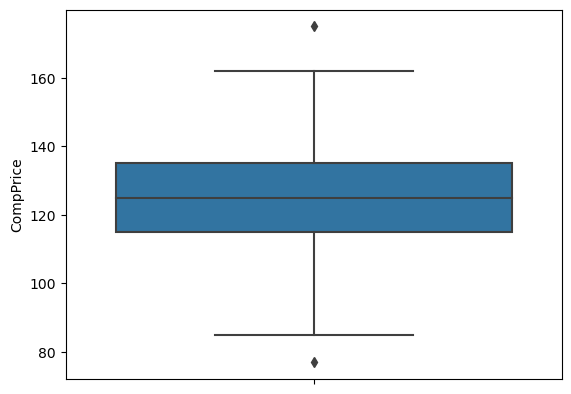

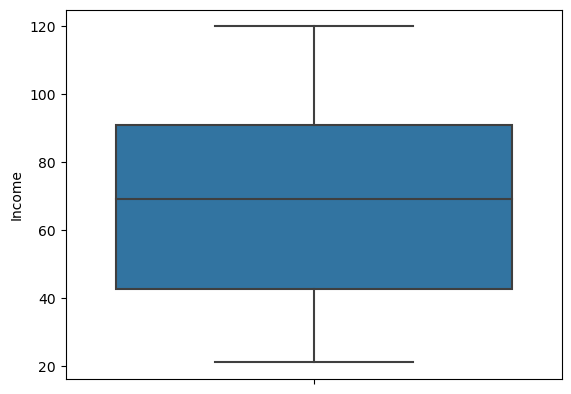

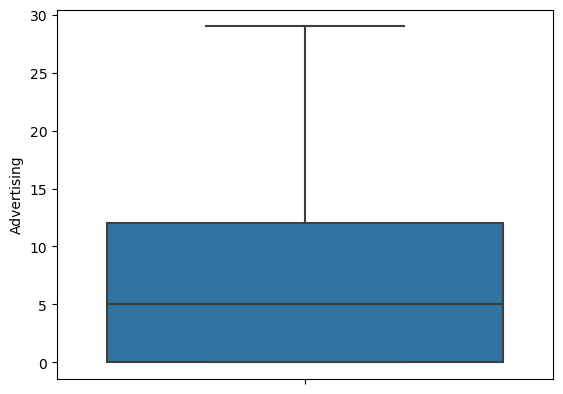

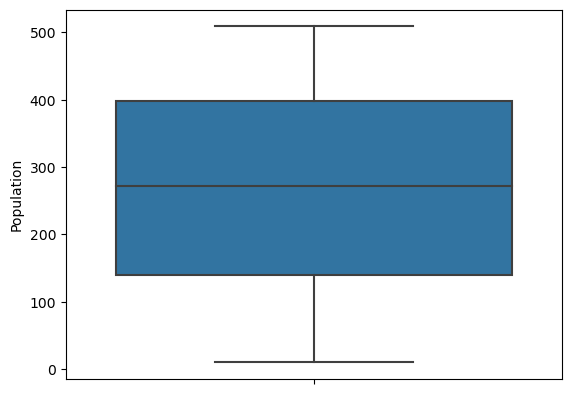

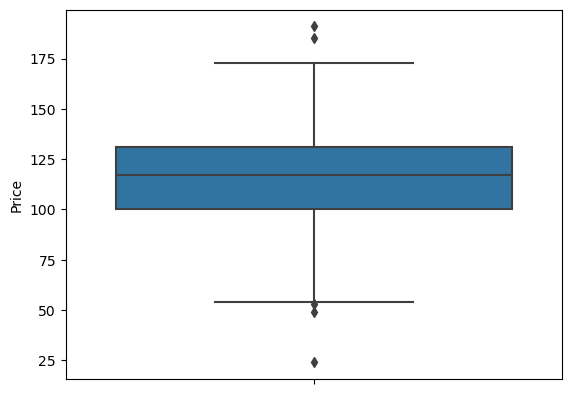

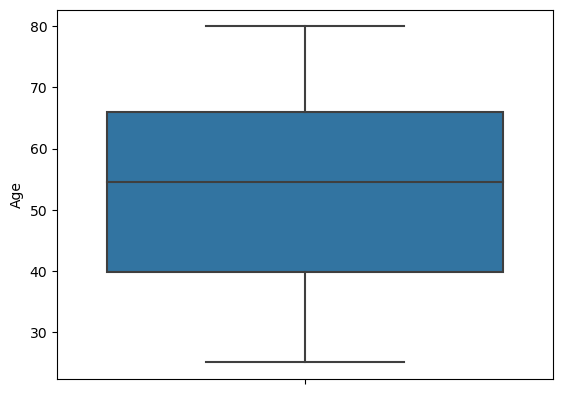

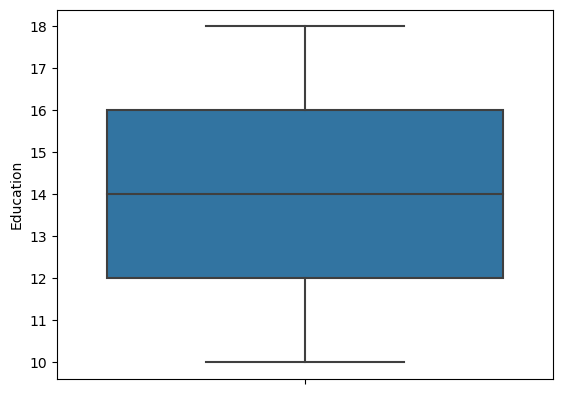

In [9]:
for i in company1.describe(include = ['float64','int64']).columns:
    sns.boxplot(y = i , data = company1)
    plt.show()
    

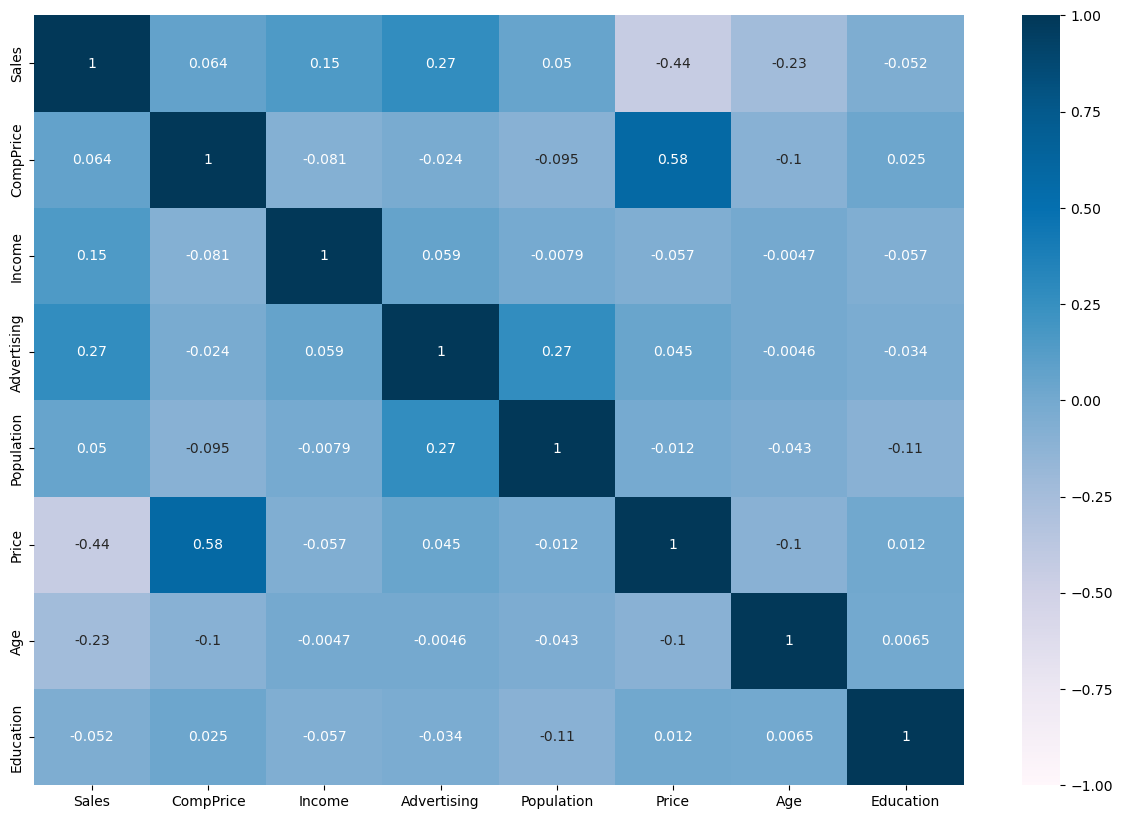

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(company1.corr(),vmax = 1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

<Figure size 3000x3000 with 0 Axes>

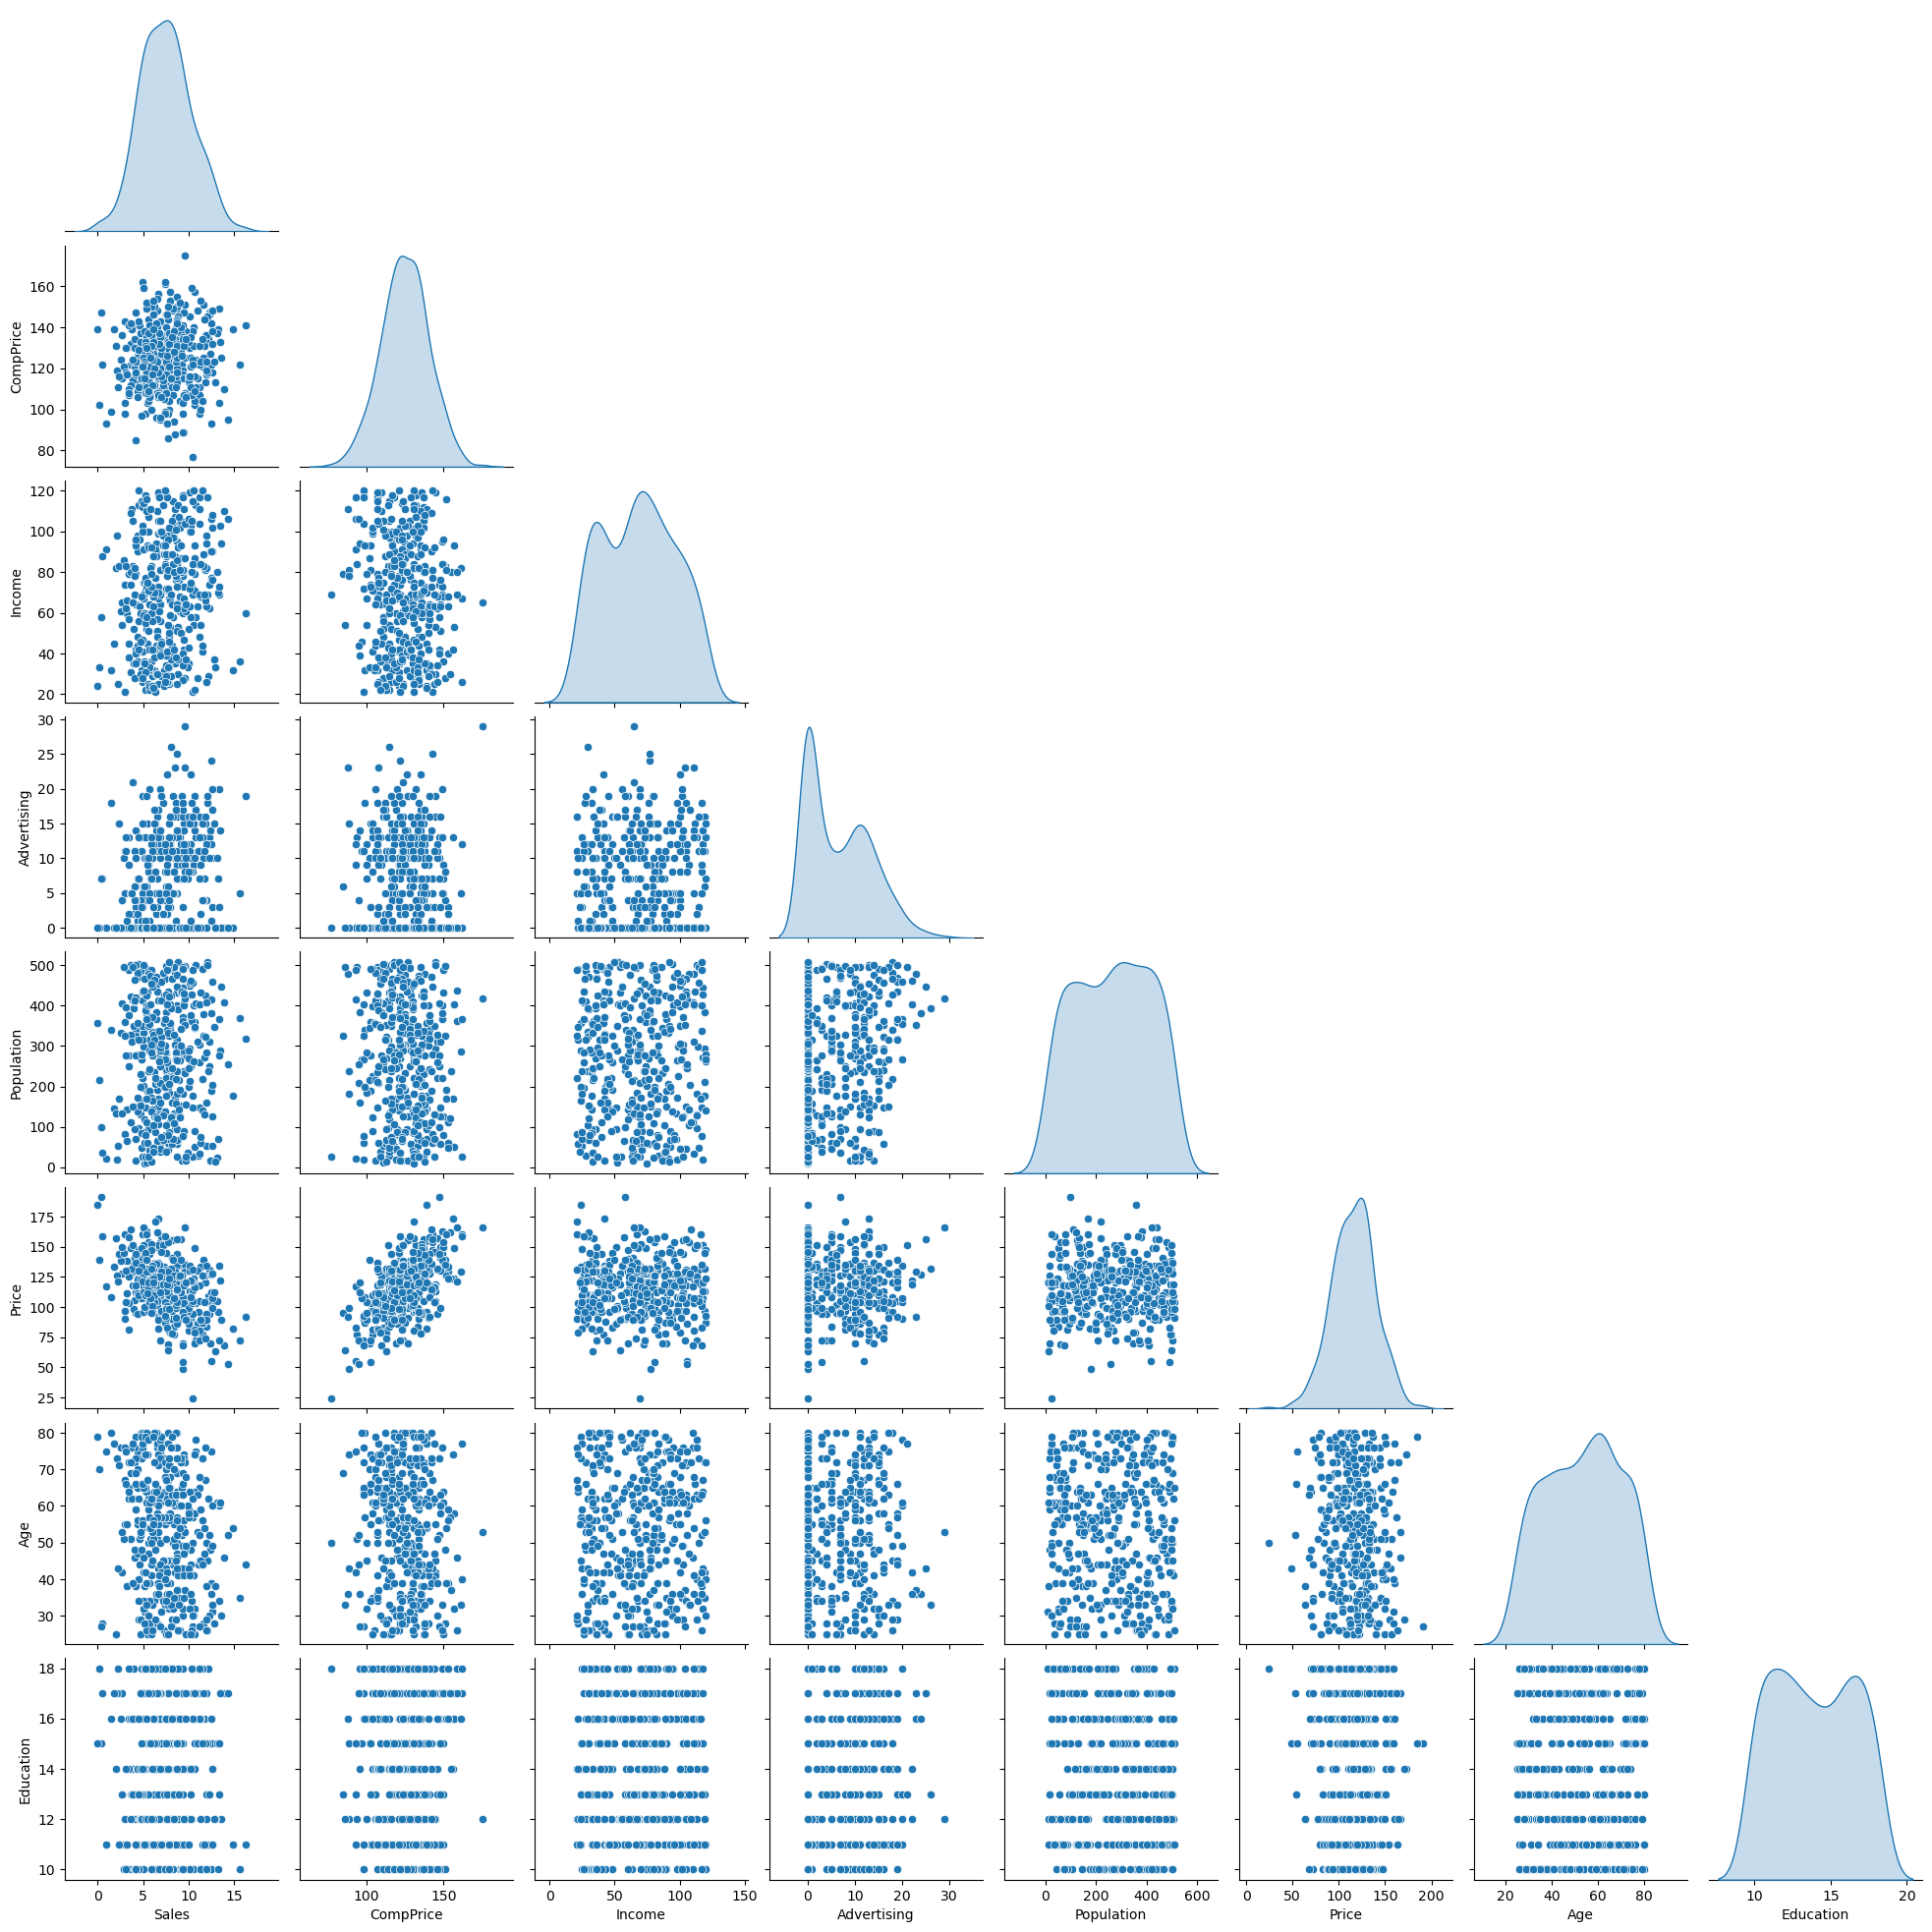

In [11]:
plt.figure(figsize=(30,30))
sns.pairplot(company1,diag_kind='kde',corner=True)
plt.show() # to visualize attributes at once

In [12]:
# Let's create new target variable Sale based on Sales and convert it into categorical:

company2 = company1.copy()

company2.insert(11,'Sale'," ")

for i in range(0,len(company2['Sales']),1):
    if company2['Sales'].iloc[i] <= 4:
        company2['Sale'].iloc[i] = 'Low'
    elif company2['Sales'].iloc[i] > 4 and company2['Sales'].iloc[i] <= 10:
        company2['Sale'].iloc[i] = 'Med'
    else:
        company2['Sale'].iloc[i] = 'High'
        
        
company2.drop('Sales',axis=1,inplace=True) #Dropping sales column
company2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Med
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Med
4,141,64,3,340,128,Bad,38,13,Yes,No,Med


In [13]:
LE = LabelEncoder()
company2['ShelveLoc']= LE.fit_transform(company2['ShelveLoc'])
company2['Urban']= LE.fit_transform(company2['Urban'])
company2['US']= LE.fit_transform(company2['US'])
company2['Sale']= LE.fit_transform(company2['Sale'])

In [14]:
company2['ShelveLoc']=company2['ShelveLoc'].astype('category')
company2['Urban']=company2['Urban'].astype('category')
company2['US']=company2['US'].astype('category')
company2['Sale']=company2['Sale'].astype('category')
company2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    category
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    category
 9   US           400 non-null    category
 10  Sale         400 non-null    category
dtypes: category(4), int64(7)
memory usage: 24.1 KB


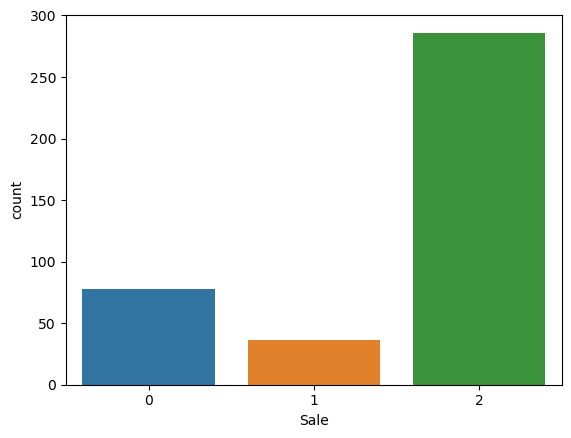

In [15]:
sns.countplot(x= 'Sale',data = company2)
plt.show()
# target variable is imbalanced.

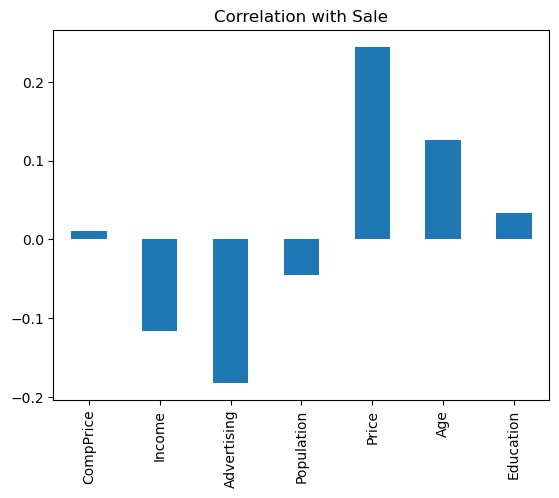

In [16]:
correlations = company2.corrwith(company2.Sale)
correlations = correlations[correlations!=1]
correlations.plot(kind = 'bar')
plt.title('Correlation with Sale')
plt.show()

In [17]:
# Let's split df into features and target:
y = company2['Sale']
x = company2.drop('Sale',axis=1)

In [18]:
# Let's further split X & y into train and test:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42)

## Random Forest Model

In [19]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_train)
print('Train data score: ',accuracy_score(y_train,y_pred))
y_test_pred = model1.predict(x_test)
print('Test data score: ',accuracy_score(y_test,y_test_pred))

Train data score:  1.0
Test data score:  0.77


In [20]:
# We know that target feature is imbalanced, hence let's stratify it and try the same model again:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42,stratify=y)

In [21]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(x_train,y_train)
y_pred = model2.predict(x_train)
print('Train data score: ',accuracy_score(y_train,y_pred))
y_test_pred = model2.predict(x_test)
print('Test data score: ',accuracy_score(y_test,y_test_pred))

Train data score:  1.0
Test data score:  0.77


#### Let's experiment with various hyper-parameters:

In [22]:
model3 = RandomForestClassifier(random_state=42,n_estimators = 100)
model3.fit(x_train,y_train)
y_pred = model3.predict(x_train)
print('Train data score: ',accuracy_score(y_train,y_pred))
y_test_pred = model3.predict(x_test)
print('Test data score: ',accuracy_score(y_test,y_test_pred))

Train data score:  1.0
Test data score:  0.77


In [23]:
model4 = RandomForestClassifier(random_state=42,n_estimators = 100,max_depth=3)
model4.fit(x_train,y_train)
y_pred = model4.predict(x_train)
print('Train data score: ',accuracy_score(y_train,y_pred))
y_test_pred = model4.predict(x_test)
print('Test data score: ',accuracy_score(y_test,y_test_pred))

Train data score:  0.73
Test data score:  0.71


In [24]:
model5 = RandomForestClassifier(random_state=42,n_estimators = 100,max_depth=3,max_features=7)
model5.fit(x_train,y_train)
y_pred = model5.predict(x_train)
print('Train data score: ',accuracy_score(y_train,y_pred))
y_test_pred = model5.predict(x_test)
print('Test data score: ',accuracy_score(y_test,y_test_pred))

Train data score:  0.7666666666666667
Test data score:  0.74


In [25]:
model6 = RandomForestClassifier(random_state=42,n_estimators = 100,max_depth=3,max_features=7,min_samples_split=20)
model6.fit(x_train,y_train)
y_pred = model6.predict(x_train)
print('Train data score: ',accuracy_score(y_train,y_pred))
y_test_pred = model6.predict(x_test)
print('Test data score: ',accuracy_score(y_test,y_test_pred))

Train data score:  0.77
Test data score:  0.75


In [26]:
# Let's try Grid Search and check for better accuracy score models:
RF = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [3,5,7],
          'n_estimators': [100],
          'min_samples_leaf':[2],
          'min_samples_split': range(20,40,1)}
inner_cv = KFold(n_splits=2,shuffle=True,random_state=42)
outer_cv = KFold(n_splits=5,shuffle=True,random_state=42)

grid_search = GridSearchCV(estimator= RF, param_grid=params, cv = inner_cv, n_jobs=-1, scoring="accuracy")
grid_search.fit(x, y)
rf_best = grid_search.best_estimator_
total_score = cross_val_score(grid_search,X=x,y=y,cv=outer_cv)
print('Total_Scores           :', np.round(total_score*100),2)
print('Best Score             :', grid_search.best_score_)
print('RF Best Model          :', rf_best)


Total_Scores           : [71. 78. 81. 76. 61.] 2
Best Score             : 0.7324999999999999
RF Best Model          : RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=35,
                       n_jobs=-1, random_state=42)


In [27]:
model7 = RandomForestClassifier(random_state=42,n_estimators = 100,max_depth=5,max_features=10,min_samples_split=35,
                                min_samples_leaf=2)
model7.fit(x_train,y_train)
y_pred = model7.predict(x_train)
print('Train data score: ',accuracy_score(y_train,y_pred))
y_test_pred = model7.predict(x_test)
print('Test data score: ',accuracy_score(y_test,y_test_pred))

Train data score:  0.7733333333333333
Test data score:  0.76


In [28]:
#Let's find out important features:
imp_df = pd.DataFrame({'Features': x.columns, 'Importance': model7.feature_importances_})
imp_df.sort_values(by='Importance',ascending=False)

,Features,Importance
4,Price,0.329560
5,ShelveLoc,0.230157
2,Advertising,0.138730
0,CompPrice,0.087283
6,Age,0.079099
1,Income,0.058852
7,Education,0.037367
3,Population,0.034435
9,US,0.003832
8,Urban,0.000685


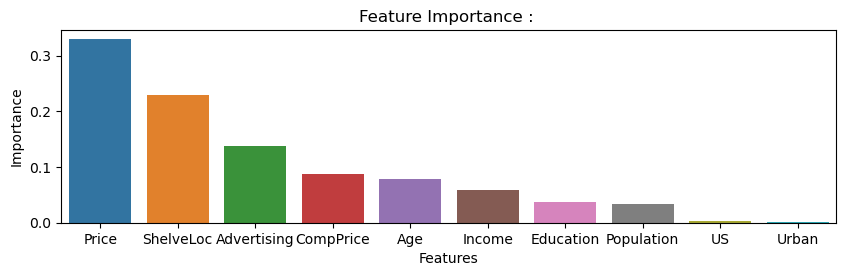

In [29]:
plt.figure(figsize=(10,2.5))
sns.barplot(y='Importance',x='Features',data = imp_df.sort_values(by='Importance',ascending=False))
plt.title('Feature Importance : ')
plt.show()

In [30]:
confusion_matrix(y_test,y_test_pred)

array([[ 6,  0, 14],
       [ 0,  0,  9],
       [ 1,  0, 70]], dtype=int64)

In [31]:
classification_report(y_test,y_test_pred,output_dict=True)

{'0': {'precision': 0.8571428571428571,
  'recall': 0.3,
  'f1-score': 0.4444444444444444,
  'support': 20},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9},
 '2': {'precision': 0.7526881720430108,
  'recall': 0.9859154929577465,
  'f1-score': 0.8536585365853658,
  'support': 71},
 'accuracy': 0.76,
 'macro avg': {'precision': 0.5366103430619559,
  'recall': 0.42863849765258216,
  'f1-score': 0.4327009936766035,
  'support': 100},
 'weighted avg': {'precision': 0.705837173579109,
  'recall': 0.76,
  'f1-score': 0.6949864498644986,
  'support': 100}}